# 在化学反应中保护原子
有时在使用rxn文件时，很难准确表达或全面考虑到每个细节，导致不需要的原子发生反应，并产生副产物。而rdkit也提供了保护原子的操作，避免不需要的原子参与到反应中。还是以形成酰胺键为例。

## 1.rxn文件创建反应
 - 通过rxn文件创建一个反应模式：ReactionFromRxnFile()
 - 检查一下该反应：ReactionToImage()

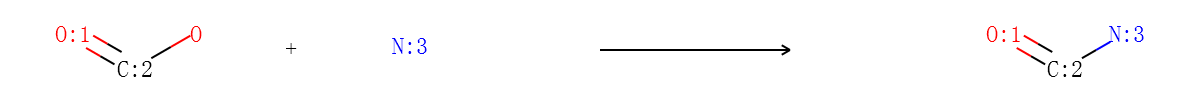

In [1]:
import os
from rdkit import Chem
from rdkit.Chem import AllChem as Chem
from rdkit import RDConfig
rxn_file = os.path.join(RDConfig.RDDocsDir, 'Book\data\AmideBond.rxn')
rxn = Chem.ReactionFromRxnFile(rxn_file)
img = Chem.Draw.ReactionToImage(rxn, subImgSize=(300, 100))
img

In [2]:
img.save('data/protect_atoms_reaction_1.png')

在这个反应中，氮原子只要连有氢原子，就可以发生反应。当使用一个已经含有酰胺键的化合物作为反应物时，同样也可以发生反应。
 - 设置反应物acid和base
 - 按照模式进行反应：rxn.RunReactants()
 - 对反应物进行核对：SanitizeMol()

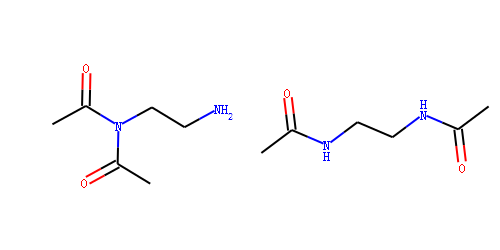

In [3]:
acid = Chem.MolFromSmiles('CC(=O)O')
base = Chem.MolFromSmiles('CC(=O)NCCN')
ps = rxn.RunReactants((acid,base))
[Chem.SanitizeMol(x[0]) for x in ps]
img = Chem.Draw.MolsToGridImage([x[0] for x in ps], molsPerRow=2, subImgSize=(250, 250))
img

In [4]:
img.save('data/protect_atoms_reaction_2.png')

## 2.保护目标原子
如果不想让酰胺氮原子发生反应，可以将它保护起来
 - 将要保护的基团转成SMARTS，记录在amidep中
 - 在反应物中查找所有符合amidep的子结构
 - 遍历每个符合的子结构，设置属性，键为"_protected"，值随意

In [5]:
amidep = Chem.MolFromSmarts('[N;$(NC=[O,S])]')
for match in base.GetSubstructMatches(amidep):
    base.GetAtomWithIdx(match[0]).SetProp('_protected', '1')

 - 再进行反应，被保护的基团就不会发生反应了

In [6]:
ps = rxn.RunReactants((acid,base))
print(len(ps))
Chem.MolToSmiles(ps[0][0])

1


'CC(=O)NCCNC(C)=O'